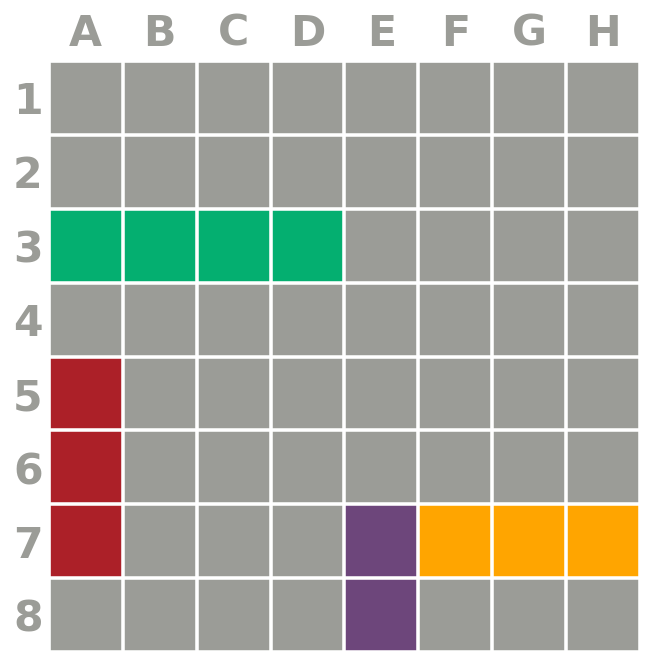

In [1]:
from battleship.board import *
from battleship.spotter_model import Question, Answer, CodeSpotterModel, DirectSpotterModel
from tqdm import tqdm

board_array = Board.from_trial_id(1,"prolific_contexts").to_symbolic_array()
Board.from_trial_id(1,"prolific_contexts")

In [2]:
user_question = "Are there more ship tiles in odd rows than even rows?"

code_spotter_model = CodeSpotterModel(board_id=1, board_experiment="prolific_contexts", history=None)
direct_spotter_model = DirectSpotterModel(board_id=1, board_experiment="prolific_contexts", history=None)

q = Question(text=user_question)
code_ans = code_spotter_model.answer(q)
direct_ans = direct_spotter_model.answer(q)

In [3]:
code_ans, direct_ans

(Yes, No)

In [8]:
code_ans.code_question.question.text

'Are there more ship tiles in odd rows than even rows?'

In [5]:
assert False

AssertionError: 

In [ ]:
examples_history = []

questions_boards = [("Is there a ship at B6?",5),
                    ("Is the green ship horizontal?",4),
                    ("Is the orange ship 5 tiles long?",3),
                    ("Is the red ship vertical?",2),
                    ("Is there a ship at A4?",1),
                    ]

for (question, board) in tqdm(questions_boards):
    spotter_model = SpotterModel(board_id=board, board_experiment="prolific_contexts", history=None)
    q_ex = Question(text=question)
    a_ex = spotter_model.answer(q_ex)
    examples_history.append({"question":question, "code": q_ex.codestr, "answer": a_ex.text, "board_id": board})

100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


In [ ]:
examples_history

[{'question': 'Is there a ship at B6?',
  'code': "def answer(board):\n    return 'Yes' if board[5, 1] != 'W' else 'No'",
  'answer': 'Yes',
  'board_id': 5},
 {'question': 'Is the green ship horizontal?',
  'code': "def answer(board):\n    return 'Yes' if board[5, 5] == 'G' and board[5, 6] == 'G' else 'No'",
  'answer': 'No',
  'board_id': 4},
 {'question': 'Is the orange ship 5 tiles long?',
  'code': "def answer(board):\n    return 'No' if np.sum(board == 'O') == 5 else 'Yes'",
  'answer': 'Yes',
  'board_id': 3},
 {'question': 'Is the red ship vertical?',
  'code': "def answer(board):\n    return 'Yes' if board[5:8, 2].tolist() == ['R', 'R', 'R'] else 'No'",
  'answer': 'Yes',
  'board_id': 2},
 {'question': 'Is there a ship at A4?',
  'code': "def answer(board):\n    return 'No' if board[3, 0] == 'W' else 'Yes'",
  'answer': 'No',
  'board_id': 1}]

In [ ]:
user_question = "Is there a ship at A3?"
spotter_model = SpotterModel(board_id=1, board_experiment="prolific_contexts", history=examples_history)
q = Question(text=user_question)
a = spotter_model.answer(q)

In [ ]:
q.code

<function answer(board)>

In [ ]:
a.text

'Yes'